In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [41]:
df = pd.read_csv("RealData/Real_combine.csv")
df.head()

,T,TM,Tm,H,VV,V,VM,PM2.5
0,23.4,30.3,19.0,59,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,51,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55,7.7,3.7,7.6,154.037500
4,23.1,30.6,17.4,46,6.9,3.3,5.4,223.208333


In [44]:
df['T'] = df['T'].apply(lambda x : x.replace('-', ''))
for i in df.columns:
    if (i=="PM2.5"):
        continue
    df[i] = df[i].apply(lambda x : x.replace('-', ''))

In [48]:
df.dropna()

,T,TM,Tm,H,VV,V,VM,PM2.5
0,23.4,30.3,19.0,59,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,51,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55,7.7,3.7,7.6,154.037500
4,23.1,30.6,17.4,46,6.9,3.3,5.4,223.208333
...,...,...,...,...,...,...,...,...
1122,22.2,27.7,17.7,63,6.9,2.8,7.6,188.041667
1123,22.7,28.4,18.1,65,6.3,3.9,5.4,310.250000
1124,23.4,29.1,18.4,62,6,5.7,9.4,204.375000
1125,23.8,30.2,17.7,56,5.5,6.1,9.4,223.250000


In [62]:
df.drop(df[df['T']==""].index, inplace=True)
df.drop(df[df['VM']==""].index, inplace=True)

In [84]:
df.dropna(inplace=True)

In [85]:
for i in df.columns:
    df[i] = df[i].apply(lambda x: float(x))

In [87]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

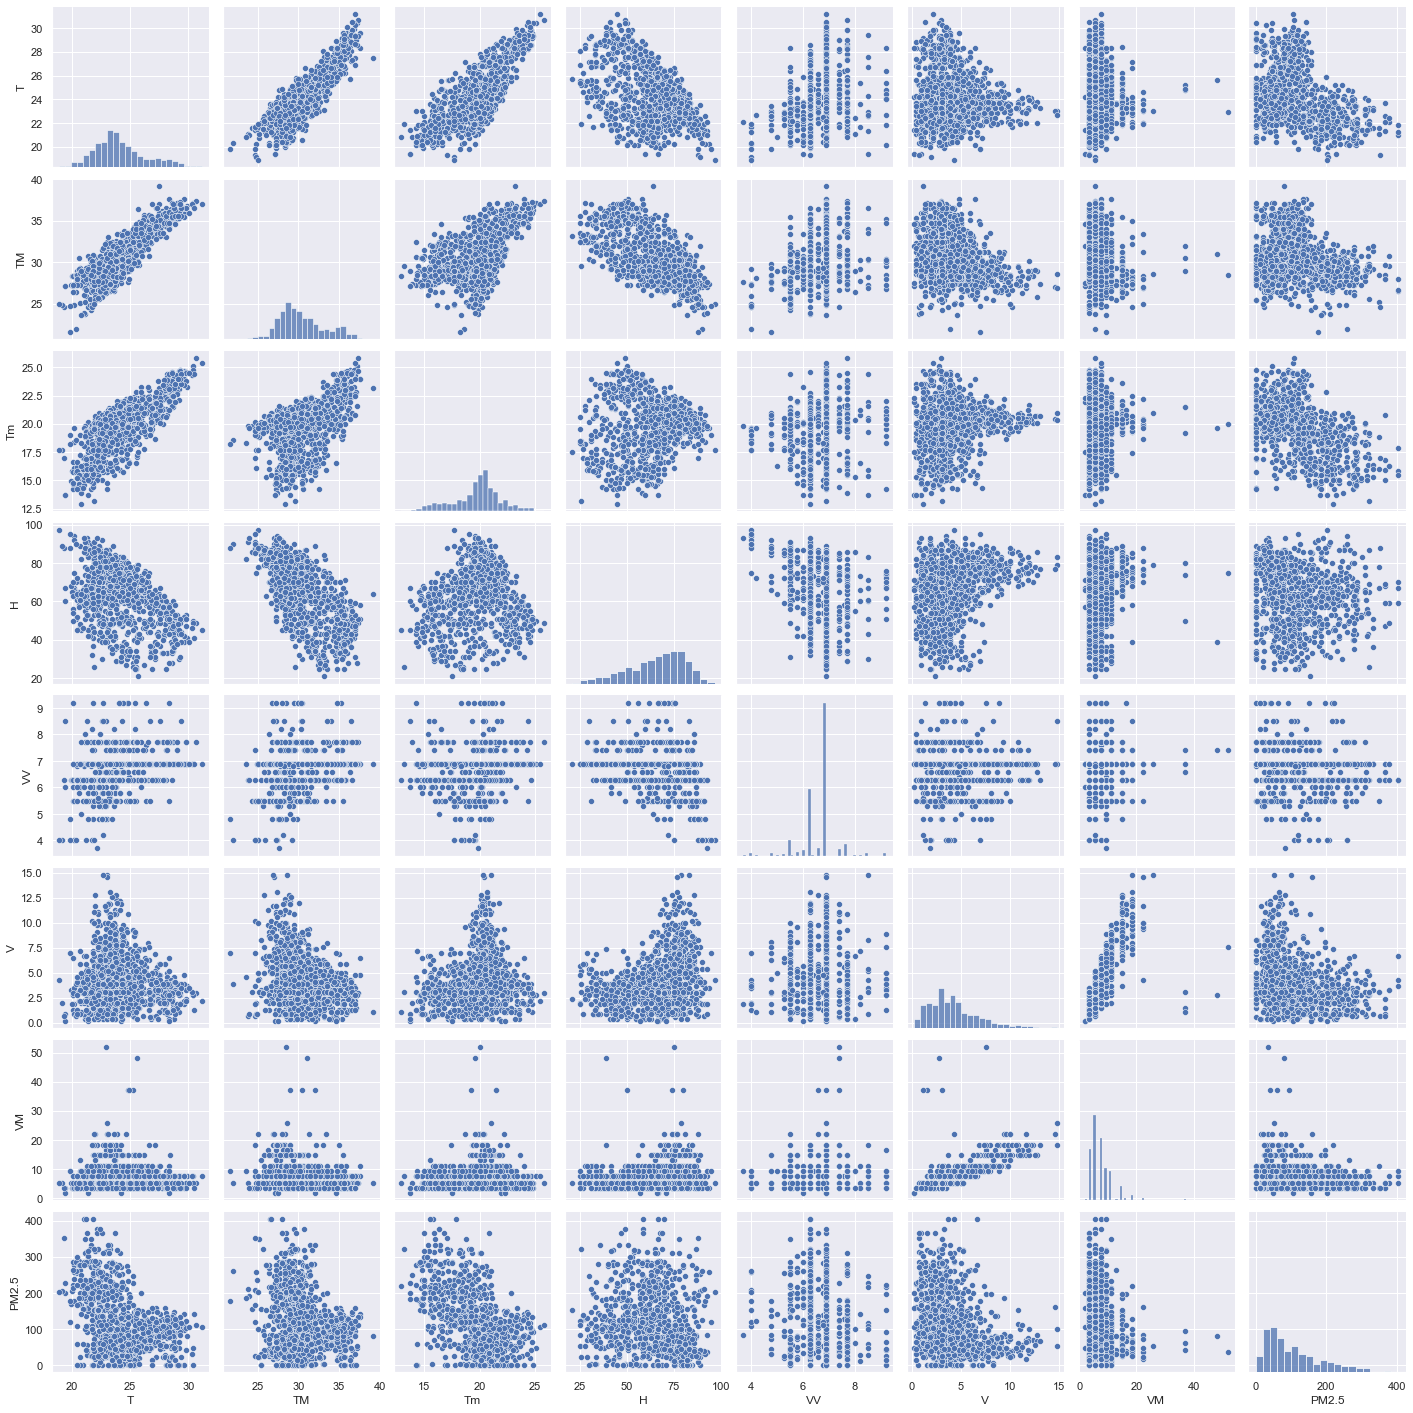

In [91]:
sns.pairplot(df)

In [92]:
df.corr()

,T,TM,Tm,H,VV,V,VM,PM2.5
T,1.000000,0.869258,0.753944,-0.455387,0.325016,-0.112894,-0.066897,-0.347038
TM,0.869258,1.000000,0.478298,-0.636506,0.287989,-0.290409,-0.201408,-0.162840
Tm,0.753944,0.478298,1.000000,0.156138,0.138933,0.163599,0.141125,-0.514716
H,-0.455387,-0.636506,0.156138,1.000000,-0.274199,0.354845,0.262063,-0.218054
VV,0.325016,0.287989,0.138933,-0.274199,1.000000,0.051324,0.042967,-0.123441
V,-0.112894,-0.290409,0.163599,0.354845,0.051324,1.000000,0.710970,-0.333317
VM,-0.066897,-0.201408,0.141125,0.262063,0.042967,0.710970,1.000000,-0.268927
PM2.5,-0.347038,-0.162840,-0.514716,-0.218054,-0.123441,-0.333317,-0.268927,1.000000


<AxesSubplot:>

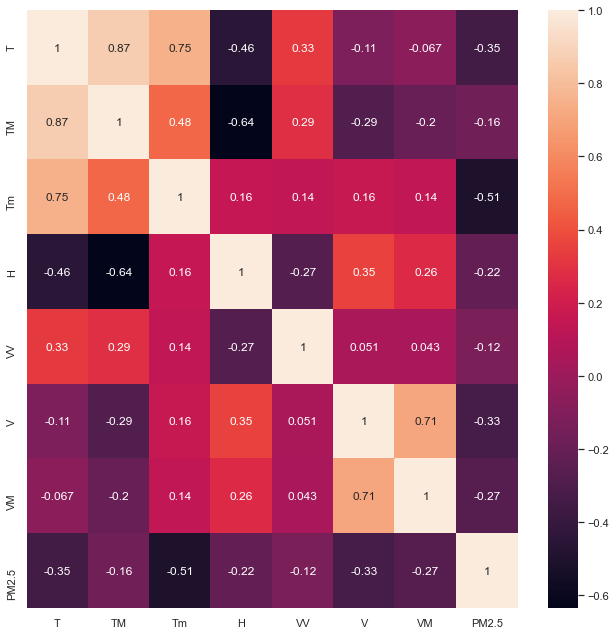

In [98]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot=True)

# Selecting Feature Importance

In [99]:
from sklearn.ensemble import ExtraTreesRegressor

In [100]:
tree = ExtraTreesRegressor()
tree.fit(X, Y)

ExtraTreesRegressor()

In [115]:
for i in range(len(X.columns)):
    print(X.columns[i], tree.feature_importances_[i])

T 0.18371129317987075
TM 0.1066490779053951
Tm 0.3036194830618343
H 0.12915342777963462
VV 0.06649876218386949
V 0.14314992548659827
VM 0.0672180304027976


In [114]:
plt.figure()

0
1
2
3
4
5
6
